In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../../data/Ames_outliers_removed.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallC

In [7]:
df = df.drop('Id', axis=1)

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
100 * df.isnull().sum() / len(df)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.788462
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [10]:
def percentage_missing(my_df):
    result = 100 * df.isnull().sum() / len(df)
    result = result[result > 0].sort_values()
    return result

In [11]:
percent_nan = percentage_missing(df)

In [12]:
percent_nan

Electrical       0.068681
MasVnrArea       0.549451
BsmtQual         2.541209
BsmtCond         2.541209
BsmtFinType1     2.541209
BsmtExposure     2.609890
BsmtFinType2     2.609890
GarageCond       5.563187
GarageQual       5.563187
GarageFinish     5.563187
GarageYrBlt      5.563187
GarageType       5.563187
LotFrontage     17.788462
FireplaceQu     47.390110
MasVnrType      59.821429
Fence           80.769231
Alley           93.750000
MiscFeature     96.291209
PoolQC          99.656593
dtype: float64

(0.0, 1.0)

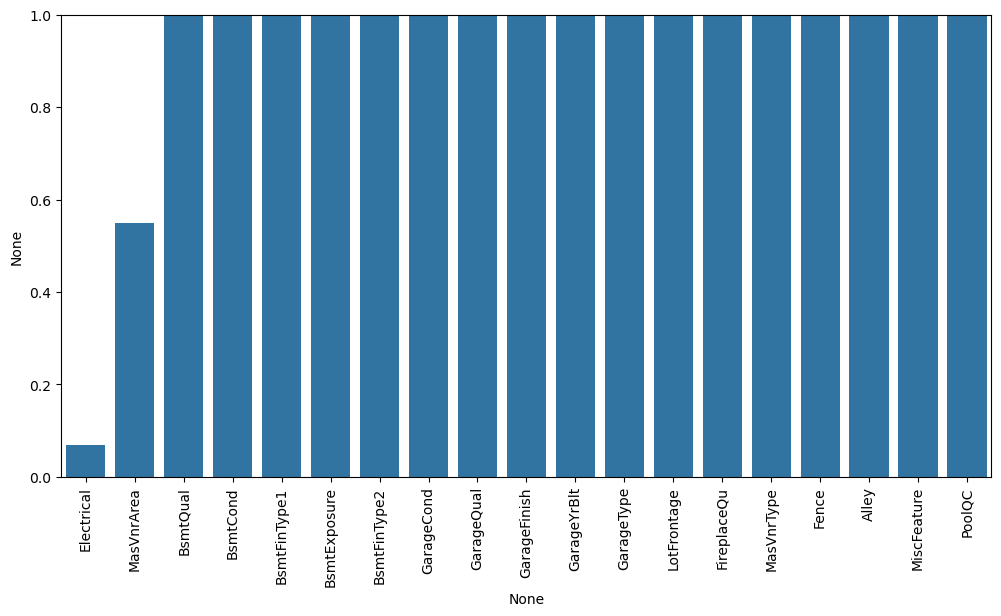

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [14]:
percent_nan[percent_nan < 1]

Electrical    0.068681
MasVnrArea    0.549451
dtype: float64

In [15]:
100 / len(df)

0.06868131868131869

In [16]:
df[df['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1375,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [17]:
df[df['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
528,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
649,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
934,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
971,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
975,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1240,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1275,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [18]:
mean_value = df['MasVnrArea'].mean()
df['MasVnrArea'].fillna(mean_value, inplace=True)

In [19]:
df = df.dropna(axis=0, subset=['Electrical'])

In [20]:
df['Electrical'].info()

<class 'pandas.core.series.Series'>
Index: 1455 entries, 0 to 1455
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1455 non-null   object
dtypes: object(1)
memory usage: 22.7+ KB


In [21]:
percent_nan = percentage_missing(df)

In [22]:
percent_nan

BsmtQual         2.542955
BsmtCond         2.542955
BsmtFinType1     2.542955
BsmtExposure     2.611684
BsmtFinType2     2.611684
GarageCond       5.567010
GarageQual       5.567010
GarageFinish     5.567010
GarageType       5.567010
GarageYrBlt      5.567010
LotFrontage     17.800687
FireplaceQu     47.353952
MasVnrType      59.793814
Fence           80.756014
Alley           93.745704
MiscFeature     96.288660
PoolQC          99.656357
dtype: float64

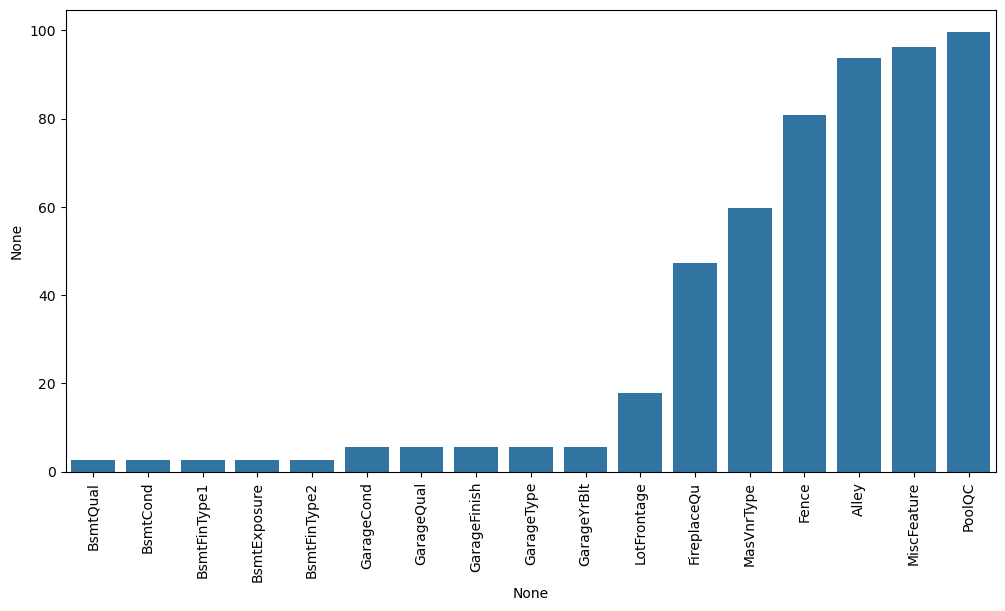

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [24]:
df[df['BsmtQual'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


In [25]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [26]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [27]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [28]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [29]:
percent_nan

BsmtQual         2.542955
BsmtCond         2.542955
BsmtFinType1     2.542955
BsmtExposure     2.611684
BsmtFinType2     2.611684
GarageCond       5.567010
GarageQual       5.567010
GarageFinish     5.567010
GarageType       5.567010
GarageYrBlt      5.567010
LotFrontage     17.800687
FireplaceQu     47.353952
MasVnrType      59.793814
Fence           80.756014
Alley           93.745704
MiscFeature     96.288660
PoolQC          99.656357
dtype: float64

In [30]:
bsmt_col = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']

In [31]:
df[bsmt_col] = df[bsmt_col].fillna('None')

In [32]:
percent_nan = percentage_missing(df)
percent_nan

GarageType       5.567010
GarageYrBlt      5.567010
GarageFinish     5.567010
GarageQual       5.567010
GarageCond       5.567010
LotFrontage     17.800687
FireplaceQu     47.353952
MasVnrType      59.793814
Fence           80.756014
Alley           93.745704
MiscFeature     96.288660
PoolQC          99.656357
dtype: float64

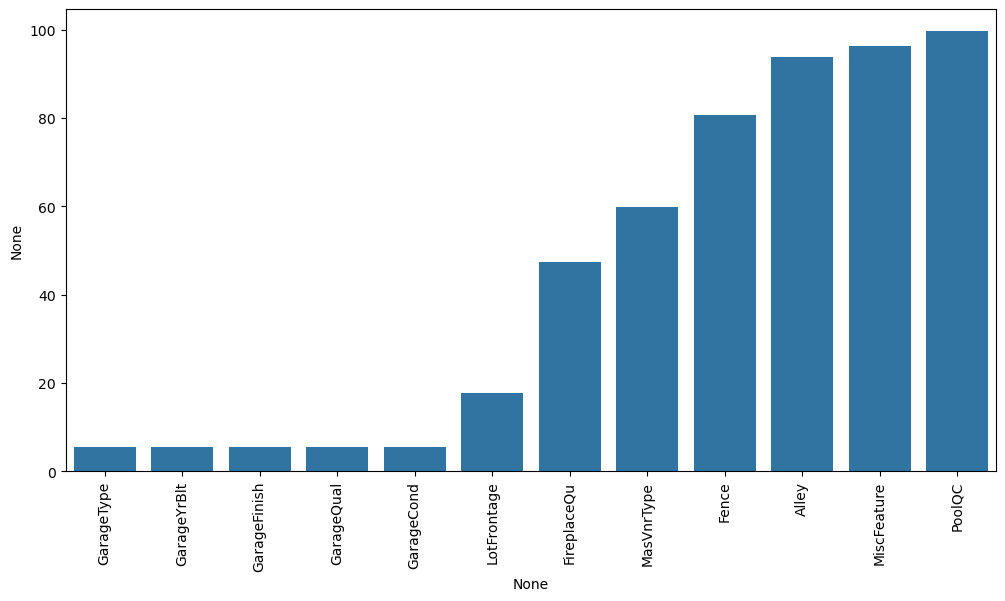

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [34]:
df[df['GarageType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1403,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1445,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1446,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [35]:
df[df['GarageYrBlt'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1403,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1445,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1446,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [36]:
print(f"Garage type: {df['GarageType'].unique()}")
print(f"Garage year built: {df['GarageYrBlt'].unique()}")
print(f"Garage finished: {df['GarageFinish'].unique()}")
print(f"Garage quality: {df['GarageQual'].unique()}")
print(f"Garage condition: {df['GarageCond'].unique()}")

Garage type: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Garage year built: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Garage finished: ['RFn' 'Unf' 'Fin' nan]
Garage quality: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Garage condition: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [37]:
garage_num_col = ['GarageYrBlt']

In [38]:
garage_txt_col = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [39]:
df[garage_num_col] = df[garage_num_col].fillna(0)

In [40]:
df[garage_txt_col] = df[garage_txt_col].fillna('None')

In [41]:
percent_nan = percentage_missing(df)

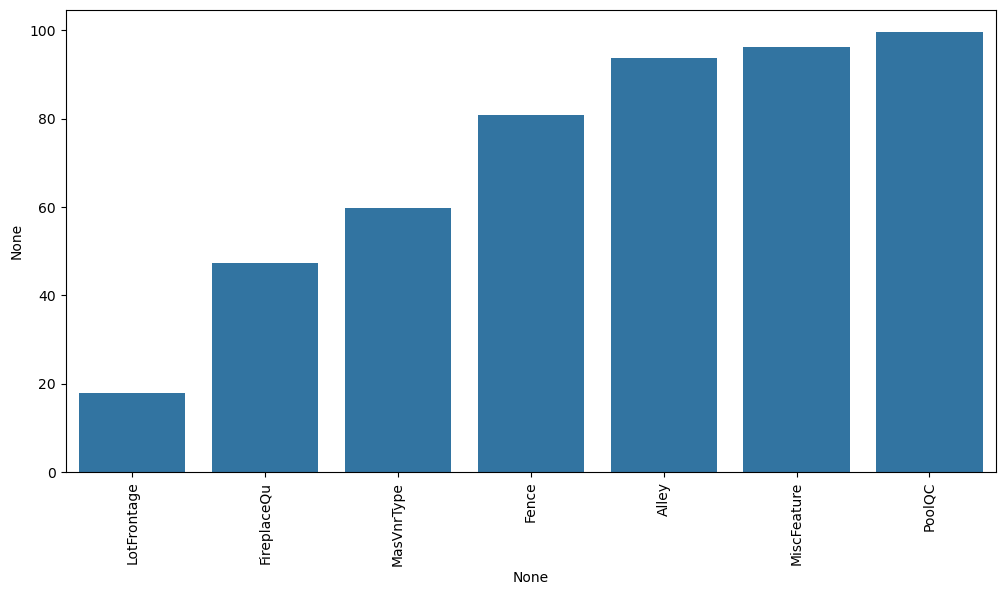

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [43]:
percent_nan

LotFrontage    17.800687
FireplaceQu    47.353952
MasVnrType     59.793814
Fence          80.756014
Alley          93.745704
MiscFeature    96.288660
PoolQC         99.656357
dtype: float64

In [44]:
df = df.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1)

In [45]:
percent_nan = percentage_missing(df)

In [46]:
percent_nan

LotFrontage    17.800687
FireplaceQu    47.353952
MasVnrType     59.793814
dtype: float64

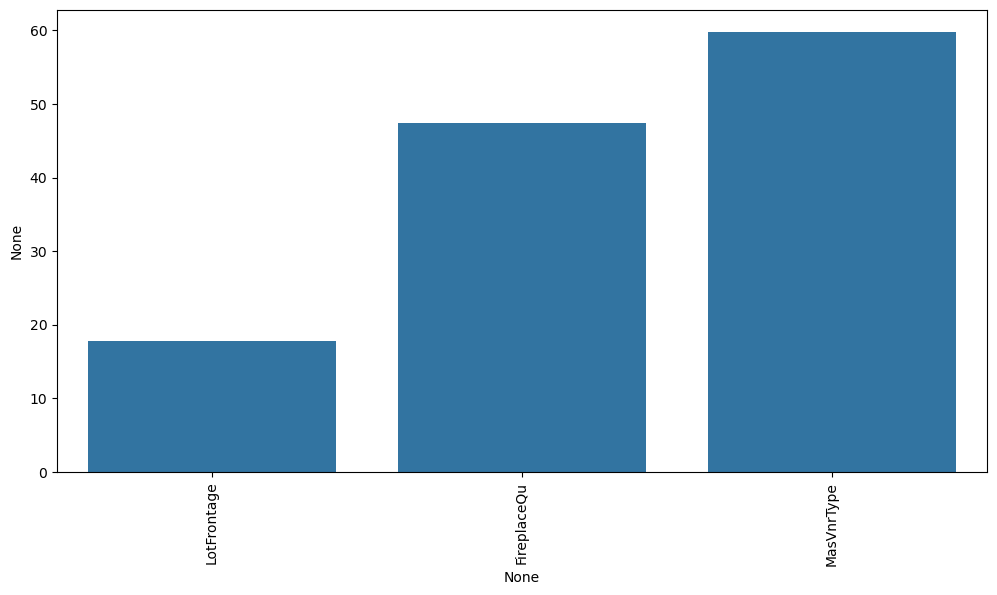

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [48]:
percent_nan

LotFrontage    17.800687
FireplaceQu    47.353952
MasVnrType     59.793814
dtype: float64

In [49]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144.,
       114., 128., 149., 313., 168., 182., 138., 152., 124., 153.,  46.])

In [50]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [51]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [52]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1452,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1453,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1454,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<Axes: xlabel='LotConfig', ylabel='LotArea'>

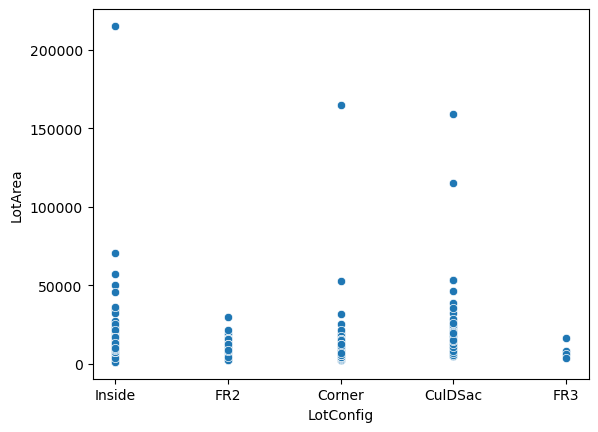

In [53]:
sns.scatterplot(data=df, x='LotConfig', y='LotArea')

In [54]:
df['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1451    Gilbert
1452     NWAmes
1453    Crawfor
1454      NAmes
1455    Edwards
Name: Neighborhood, Length: 1455, dtype: object

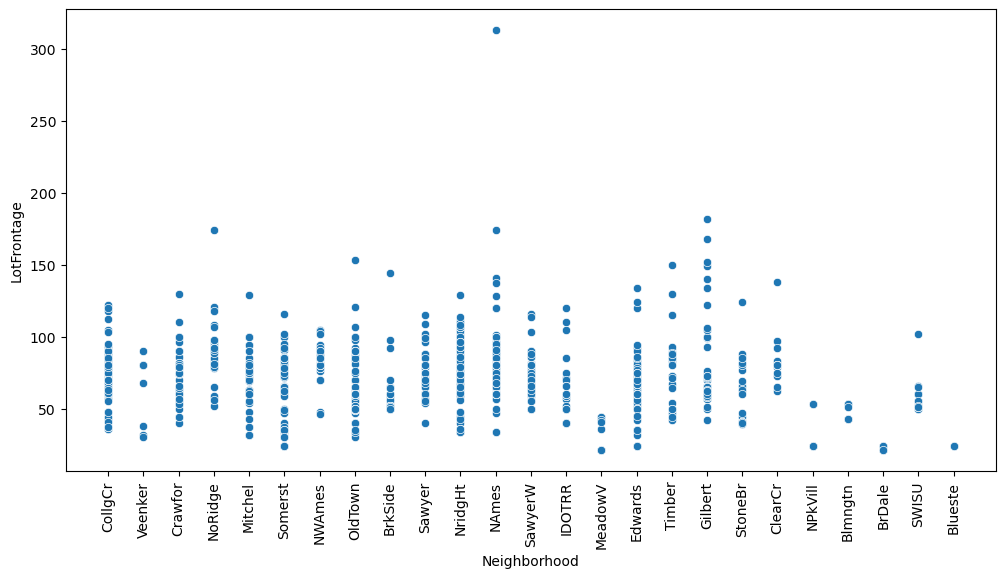

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Neighborhood', y='LotFrontage')
plt.xticks(rotation=90);

In [56]:
percent_nan

LotFrontage    17.800687
FireplaceQu    47.353952
MasVnrType     59.793814
dtype: float64

In [57]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [58]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [59]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    89.290323
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [60]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [61]:
percent_nan = percentage_missing(df)

In [62]:
percent_nan

Series([], dtype: float64)

In [63]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [64]:
df['LotFrontage'].isnull().sum()

0

In [65]:
df.to_csv('Ames_no_missing.csv', index=False)

In [66]:
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [67]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [68]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [69]:
direction = pd.Series(['Up', 'Up', 'Down'])

In [70]:
direction

0      Up
1      Up
2    Down
dtype: object

In [71]:
pd.get_dummies(direction, drop_first=True)

,Up
0,True
1,True
2,False


In [72]:
df.select_dtypes(include='object')

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1452,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1453,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1454,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1455
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   object 
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1455 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   LotShape       1455 non-null   object 
 6   LandContour    1455 non-null   object 
 7   Utilities      1455 non-null   object 
 8   LotConfig      1455 non-null   object 
 9   LandSlope      1455 non-null   object 
 10  Neighborhood   1455 non-null   object 
 11  Condition1     1455 non-null   object 
 12  Condition2     1455 non-null   object 
 13  BldgType       1455 non-null   object 
 14  HouseStyle     1455 non-null   object 
 15  OverallQual    1455 non-null   int64  
 16  OverallCond    1455 non-null   int64  
 17  YearBuilt      1455 non-null   int64  
 18  YearRemodAdd 

In [75]:
df = df.drop('MSSubClass', axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1455
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotFrontage    1455 non-null   float64
 2   LotArea        1455 non-null   int64  
 3   Street         1455 non-null   object 
 4   LotShape       1455 non-null   object 
 5   LandContour    1455 non-null   object 
 6   Utilities      1455 non-null   object 
 7   LotConfig      1455 non-null   object 
 8   LandSlope      1455 non-null   object 
 9   Neighborhood   1455 non-null   object 
 10  Condition1     1455 non-null   object 
 11  Condition2     1455 non-null   object 
 12  BldgType       1455 non-null   object 
 13  HouseStyle     1455 non-null   object 
 14  OverallQual    1455 non-null   int64  
 15  OverallCond    1455 non-null   int64  
 16  YearBuilt      1455 non-null   int64  
 17  YearRemodAdd   1455 non-null   int64  
 18  RoofStyle    

In [77]:
my_object_df = df.select_dtypes(include='object')

In [78]:
my_numeric_df = df.select_dtypes(exclude='object')

In [79]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [80]:
df_objects_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1452,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1453,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1454,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [81]:
final_df = pd.concat([my_numeric_df, df_objects_dummies], axis=1)

In [82]:
final_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,False,False,False,False,True,False,False,False,True,False
1452,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,False,False,False,False,True,False,False,False,True,False
1453,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,False,False,False,False,True,False,False,False,True,False
1454,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,False,False,False,False,True,False,False,False,True,False


In [83]:
final_df.corr()['SalePrice'].sort_values()

ExterQual_TA       -0.599501
KitchenQual_TA     -0.529546
FireplaceQu_None   -0.480616
BsmtQual_TA        -0.460978
GarageFinish_Unf   -0.418042
                      ...   
TotalBsmtSF         0.646989
GarageCars          0.649320
GrLivArea           0.720510
OverallQual         0.800950
SalePrice           1.000000
Name: SalePrice, Length: 245, dtype: float64

In [84]:
df.to_csv('Ames_final_df.csv', index=False)